In [1]:
import pandas as pd
import json
import plotly.express as px

In [22]:
# Import libraries
import glob
import pandas as pd

# Get CSV files list from a folder
path = 'Bigfile'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df_pre   = pd.concat(df_list, ignore_index=True)
#df_pre = pd.read_csv('2022-05-metropolitan-street.csv')

In [43]:
df = df_pre[df_pre['Crime type'] == 'Burglary']
df = df.drop(['Context'], axis=1)
df = df[df['LSOA name'].str.contains('Barnet') == True]

In [82]:
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
1950,c1407d31ca5b63c98be15c48e0957b8e0ea0337910a478...,2022-01,Metropolitan Police Service,Metropolitan Police Service,-0.201452,51.657150,On or near High Street,E01000250,Barnet 001C,Burglary,Investigation complete; no suspect identified
2027,15b3514bd389e651971cd5850347a78600205171716374...,2022-01,Metropolitan Police Service,Metropolitan Police Service,-0.174312,51.650023,On or near East Barnet Road,E01000251,Barnet 002D,Burglary,Investigation complete; no suspect identified
2028,dd5066eec0f154d1cc5cf6a077b882603fa651504507ab...,2022-01,Metropolitan Police Service,Metropolitan Police Service,-0.177367,51.652777,On or near Shaftesbury Avenue,E01000251,Barnet 002D,Burglary,Investigation complete; no suspect identified
2029,e3041be3144a39f9623282f6baa779ef2e747e62256191...,2022-01,Metropolitan Police Service,Metropolitan Police Service,-0.176710,51.649701,On or near Preston Court,E01000251,Barnet 002D,Burglary,Investigation complete; no suspect identified
2071,0487011a080a2ec055ce6b1c231d07a68787b91f19e2bf...,2022-01,Metropolitan Police Service,Metropolitan Police Service,-0.156715,51.650495,On or near Mount Pleasant,E01000168,Barnet 003B,Burglary,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...
1028285,b61b61fd7d2984f6563ed1177c710d9f74b3da4b9f4e1e...,2022-12,Metropolitan Police Service,Metropolitan Police Service,-0.197147,51.561190,On or near Finchley Road,E01000140,Barnet 041C,Burglary,Investigation complete; no suspect identified
1028286,2e68c1baebbd056fce829a8ea18bc85677cbcac9d29ecf...,2022-12,Metropolitan Police Service,Metropolitan Police Service,-0.197147,51.561190,On or near Finchley Road,E01000140,Barnet 041C,Burglary,Investigation complete; no suspect identified
1028295,648427fa72e4b05afacc02968b7ff403af55cc78d9b699...,2022-12,Metropolitan Police Service,Metropolitan Police Service,-0.208901,51.559805,On or near Woodley Crescent,E01000143,Barnet 041D,Burglary,Investigation complete; no suspect identified
1028296,b249a622cdb7cd75b0c2c2564ab2f59c0b7c91fc3533e1...,2022-12,Metropolitan Police Service,Metropolitan Police Service,-0.206673,51.560716,On or near Cricklewood Lane,E01000143,Barnet 041D,Burglary,Under investigation


In [86]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color='LSOA name')
fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=9,
                              margin={"r": 0, "t": 0, "l": 0, "b": 0})

In [103]:
fig = px.density_mapbox(df, lat="Latitude", lon="Longitude", radius=5)
fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=9,
                              margin={"r": 0, "t": 0, "l": 0, "b": 0})

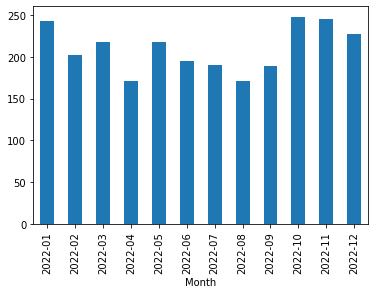

In [100]:
df_groups = df.groupby('Month')['Crime ID'].count()
df_groups.plot(kind='bar');

In [80]:
print('mean is', df_groups.mean(), 'per month')
print('max is', df_groups.max(), 'per month')
print('min is', df_groups.min(), 'per month')

mean is 209.91666666666666 per month
max is 248 per month
min is 171 per month


In [99]:
lsoa_list = []
for name in df['LSOA name']:
    if name not in lsoa_list:
        lsoa_list.append(name)
        
print(sorted(lsoa_list))
print('')
print('https://londondatastore-upload.s3.amazonaws.com/instant-atlas/lsoa-atlas/atlas.html')

['Barnet 001A', 'Barnet 001B', 'Barnet 001C', 'Barnet 001D', 'Barnet 001E', 'Barnet 001F', 'Barnet 002A', 'Barnet 002B', 'Barnet 002C', 'Barnet 002D', 'Barnet 002E', 'Barnet 003A', 'Barnet 003B', 'Barnet 003C', 'Barnet 003D', 'Barnet 004A', 'Barnet 004B', 'Barnet 004C', 'Barnet 004D', 'Barnet 004E', 'Barnet 004F', 'Barnet 005A', 'Barnet 005B', 'Barnet 005C', 'Barnet 005D', 'Barnet 006A', 'Barnet 006B', 'Barnet 006C', 'Barnet 006D', 'Barnet 006E', 'Barnet 007A', 'Barnet 007B', 'Barnet 007C', 'Barnet 007D', 'Barnet 007E', 'Barnet 007F', 'Barnet 008A', 'Barnet 008B', 'Barnet 008C', 'Barnet 008D', 'Barnet 008E', 'Barnet 009A', 'Barnet 009B', 'Barnet 009C', 'Barnet 009D', 'Barnet 009E', 'Barnet 010A', 'Barnet 010B', 'Barnet 010C', 'Barnet 010D', 'Barnet 010E', 'Barnet 011A', 'Barnet 011B', 'Barnet 011C', 'Barnet 011D', 'Barnet 011E', 'Barnet 012A', 'Barnet 012B', 'Barnet 012C', 'Barnet 012D', 'Barnet 012E', 'Barnet 013A', 'Barnet 013B', 'Barnet 013C', 'Barnet 013D', 'Barnet 013E', 'Barnet 0

In [47]:
#df = df[df['Longitude'] >= -0.305]
#df = df[df['Longitude'] <= -0.13]
#df = df[df['Latitude'] >= 51.55]
#df = df[df['Latitude'] <= 51.67]